In [2]:
%run ../datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn



In [3]:
#CARGO DATASET

C_tweets = pd.read_csv("../Data/train.csv")
C_CantTweetsEnDf=len(C_tweets.index)

In [4]:
# Quito "separador" %20 entre keywords, es solo un espacio.
# Por ejemplo, en uno decia natutal%20disaster, lo que seria "natural disater"(toda la frase es la keyword)
# No natural y disaster( por separado, dos key distintas )
C_tweets['keyword'] = C_tweets['keyword'].str.replace('%',' ')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('2','')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('0','')

In [5]:
#Cambio NaN por Nothing en Keyword
C_tweets['keyword'] = C_tweets['keyword'].fillna('Nothing') 

## Keyword en Texto

In [6]:
def keyword_in_text(df):
    """
    RECIBE: un df
    DEVUELVE: el mismo df con una columna que indica si la keyword esta en el tweet.
    """
    
    df['contains_keyword'] = 0
    cant_filas = len(df.index)
    for y in range(cant_filas):
        df['contains_keyword'][y:]= df.iloc[y][1].lower() in df.iloc[y][3].lower()

In [7]:
keyword_in_text(C_tweets)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [8]:
C_in_text = C_tweets.groupby(["contains_keyword"]).agg({'keyword':'count'}).reset_index().rename(columns={"keyword": "cantidad"})
C_in_text["Porcentaje"] = C_in_text["cantidad"]/C_in_text["cantidad"].sum() * 100 #Porcentaje del total de tweets

C_in_text

,contains_keyword,cantidad,Porcentaje
0,False,913,11.992644
1,True,6700,88.007356


Text(0, 0.5, 'Texto contiene a Keyword')

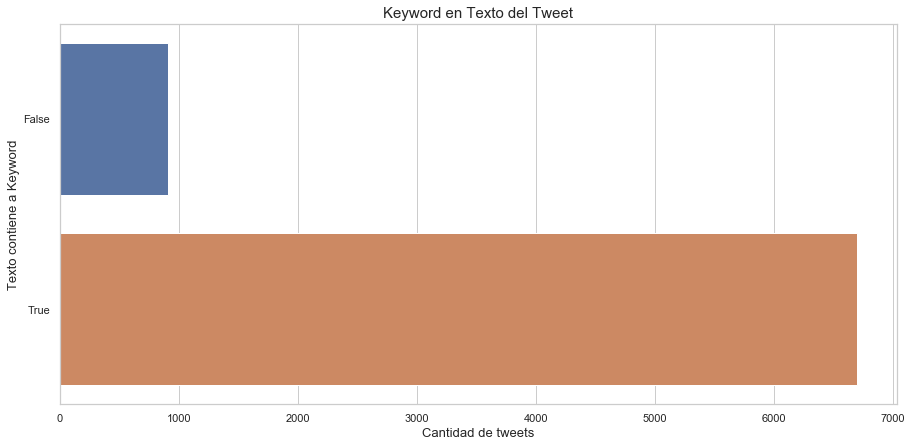

In [9]:
## Agregar un grafico, si es posible no de barplot --> No fue posible(Cristian del futuro)
#Area del plot
plt.rcParams['figure.figsize'] = (15, 7)

g = sns.barplot(y =C_in_text["contains_keyword"] , x=C_in_text["cantidad"] , orient='h',)
g.set_title("Keyword en Texto del Tweet", fontsize=15)
g.set_xlabel("Cantidad de tweets", fontsize=13,)
g.set_ylabel("Texto contiene a Keyword", fontsize=13)

### Conclusion
Como conclusion, en 900 de las 7613 (el 12% del total) tweets el keyword esta en el texto y los restantes
6700 (88% del total) contiene en alguna parte del texto a la keyword.

## Distintos keyword

In [22]:
#Nueva columna con frecuencia de la key en el nuevo subset
C_tweets["Frecuencia de Key en set"] = C_tweets["keyword"]\
.transform(lambda x: C_tweets["keyword"].value_counts()[x]) 

In [37]:
C_tweets.head(5)

,id,keyword,location,text,target,contains_keyword,Frecuencia de Key en subset,Frecuencia de Key en set
0,1,Nothing,NaN,Our Deeds are the Reason of this #earthquake M...,1,False,61,61
1,4,Nothing,NaN,Forest fire near La Ronge Sask. Canada,1,False,61,61
2,5,Nothing,NaN,All residents asked to 'shelter in place' are ...,1,False,61,61
3,6,Nothing,NaN,"13,000 people receive #wildfires evacuation or...",1,False,61,61
4,7,Nothing,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False,61,61


In [24]:
#Veo Distintos Keyword
C_keyword = C_tweets['keyword'].unique()

In [25]:
C_keyword

array(['Nothing', 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 

In [26]:
#Cuantas leyword distintas existen en el df
len(C_keyword)

222

In [27]:
#Agrupo por keyword  y cuenta las ocurrencias de cada uno
C_grouped = C_tweets.groupby(['keyword']).agg({'id':'count',"Frecuencia de Key en set":"mean"})\
.rename(columns={"id": "cantidad"})

In [28]:
C_grouped.reset_index(inplace=True)

In [29]:
C_grouped

,keyword,cantidad,Frecuencia de Key en set
0,Nothing,61,61
1,ablaze,36,36
2,accident,35,35
3,aftershock,34,34
4,airplane accident,35,35
...,...,...,...
217,wounded,37,37
218,wounds,33,33
219,wreck,37,37
220,wreckage,39,39


In [30]:
#Chequeo
print ("Suma de keyword agrupadas:", C_grouped.cantidad.sum(), " = ","Cantidad de filas en df:" , len(C_tweets.index))

Suma de keyword agrupadas: 7613  =  Cantidad de filas en df: 7613


Text(0.5, 1.0, 'Distribucion de la Frecuencia de keywords en el set')

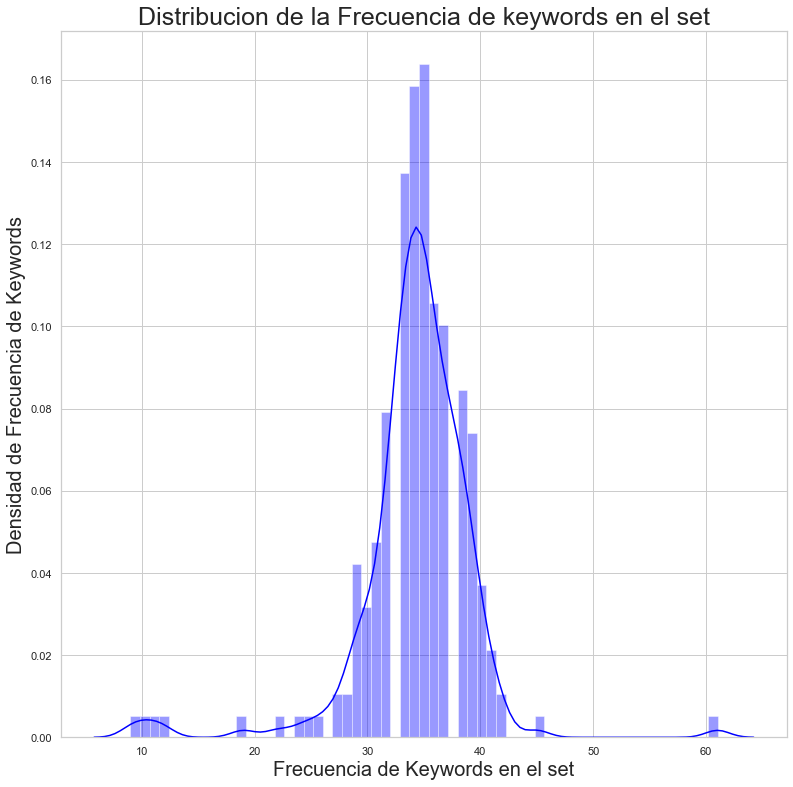

In [36]:
plt.rcParams['figure.figsize'] = (13, 13)
plt.rcParams["axes.labelsize"] = 15
g = sns.distplot(C_grouped["Frecuencia de Key en set"]\
                 ,bins=int(C_grouped["Frecuencia de Key en set"].max()),color='blue')
g.set_ylabel('Densidad de Frecuencia de Keywords', fontsize=20)
g.set_xlabel('Frecuencia de Keywords en el set', fontsize=20)
g.set_title("Distribucion de la Frecuencia de keywords en el set", fontsize=25)

### Las frecuencias de las keywords en el set se concentran en los valores de 30 a 40 en seu mayoria con un pico en los valores intermedios a estos limites

In [45]:
#Area del plot mas alto que ancho
plt.rcParams['figure.figsize'] = (15, 30)
plt.rcParams["axes.labelsize"] = 12

Text(0.5, 1.0, 'Cant de Tweets por Keyword')

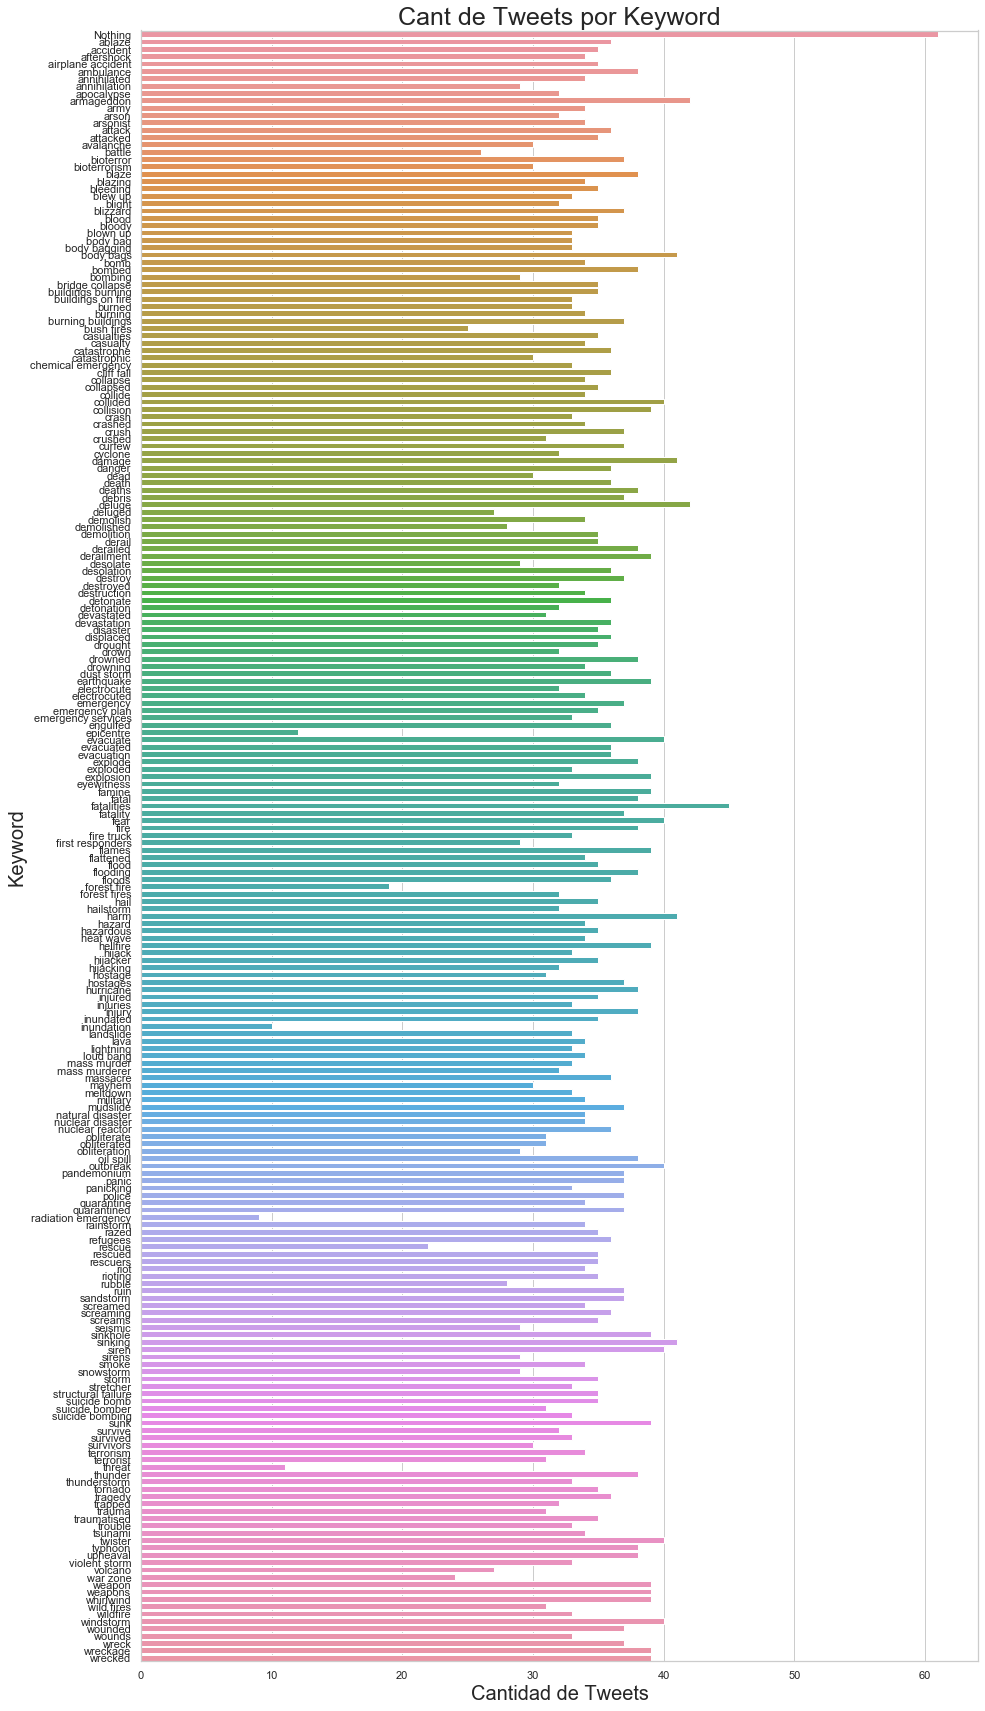

In [46]:
ax = sns.barplot(x="cantidad", y="keyword", data=C_grouped,orient='h')

ax.set_ylabel('Keyword', fontsize=20)
ax.set_xlabel('Cantidad de Tweets', fontsize=20)
ax.set_title("Cant de Tweets por Keyword", fontsize=25)

In [19]:
#TODO, achicar keywords--> Agrupara los que significan casi lo mismo